<div style="width: 100%; clear: both;">
    <div style="float: left; width: 50%;">
       <img src="http://www.uoc.edu/portal/_resources/common/imatges/marca_UOC/UOC_Masterbrand.jpg", align="left">
    </div>
</div>

<div style="float: right; width: 50%;">
    <p style="margin: 0; padding-top: 22px; text-align:right;">M1.771 · Privacidad</p>
    <p style="margin: 0; text-align:right;">Máster Universitario en Ciberseguridad y Privacidad</p>
    <p style="margin: 0; text-align:right; padding-button: 100px;">Estudios de Informática, Multimedia y Telecomunicación</p>
</div>

</div>
<div style="width: 100%; clear: both;">
<div style="width:100%;">&nbsp;</div>

# Práctica 1

--- 

Para resolver esta práctica, tenéis que poner las soluciones en el mismo *notebook*, en las celdas de código que están en blanco habilitadas para ello. Después de cada celda de código en blanco hay una celda *markdown* en verde donde podéis poner la justificación de la respuesta dada en la solución. No es obligatorio, pero sí muy recomendable que justifiquéis las respuestas que dais, ya que eso facilita la corrección en caso de una respuesta incorrecta (podiendo valorar el planteamiento), y puede ayudar a descartar posibles sospechas sobre copias.


## Publicación de microdatos

Trabajamos en una biblioteca municipal y nos han encargado que supervisemos la
publicación de datos sobre el préstamo de libros. 

La biblioteca quiere hacer públicos datos sobre los libros que toman prestados
sus usuarios con la idea de que investigadores puedan hacer estudios sobre el
tipo de libros que se prestan en base a diversos factores como la edad o el
lugar de residencia.

Para ello disponemos de unos datos sobre préstamo de libros en un fichero CSV
con los siguientes atributos (columnas):
- `name`: nombre del usuario.
- `sex`: sexo del usuario, puede tomar el valor 'F' o 'M'.
- `age`: edad del usuario.
- `postal_code`: código postal de la residencia del usuario.
- `books`: lista de libros que el usuario ha tomado prestados.

Podemos leer el fichero CSV, que se encuentra en `data/books.csv`, como un
`DataFrame` de *pandas* que podemos guardar en la variable `df_books`. 

También crearemos un copia del `DataFrame` para tener a mano los valores
originales en caso de que hagamos modificaciones en `df_books`.

**Nota**: funciones que pueden ser de utilidad:
- Para facilitar la lectura de la lista libros utilizamos la función
  [`ast.literal_eval`](https://docs.python.org/3/library/ast.html#ast.literal_eval)
  que permite interpretar directamente el string como una estructura de Python
  (en este caso una lista).
- Con la función
  [`DataFrame.info()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.info.html)
  podemos ver las columnas del `DataFrame` que acabamos de leer y su tipo .


In [1]:
import ast
import pandas as pd

df_books = pd.read_csv("data/books.csv", dtype={'postal_code': str},
                       converters={'books': ast.literal_eval})
df_books.info()
df_books_original = df_books.copy()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 5 columns):
name           20 non-null object
sex            20 non-null object
age            20 non-null int64
postal_code    20 non-null object
books          20 non-null object
dtypes: int64(1), object(4)
memory usage: 928.0+ bytes



**Ejerecicio 1** [5%]

El primer paso que nos plateamos es ver qué atributos no podemos publicar. Es
decir, qué atributos consideraremos como **identificadores**. Determina qué
atributos son identificadores y elimina esos atributos en `df_books`

**Nota**: algunas funciones que os pueden ser de utilidad:
- [`pandas.DataFrame.drop`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html):
  elimina filas o columnas de un `DataFrame`.


In [2]:
df_books.drop(['name'],axis=1, inplace=True)
df_books.info()
df_books


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 4 columns):
sex            20 non-null object
age            20 non-null int64
postal_code    20 non-null object
books          20 non-null object
dtypes: int64(1), object(3)
memory usage: 768.0+ bytes


,sex,age,postal_code,books
0,M,23,08507,{The Trickster of Seville and His Guest of Sto...
1,F,59,08304,"{The Brothers Karamazov, Les Misérables, Jane ..."
2,M,40,28048,"{The Trial, Tristram Shandy, Emma, The Waste L..."
3,F,49,14003,"{The Old Man and the Sea, The Catcher in the R..."
4,F,39,08205,"{The Adventures of Huckleberry Finn, Oedipus t..."
5,M,40,08917,"{The Hive, The Heretic, Lolita, The Adventures..."
6,F,51,08921,"{The Canterbury Tales, The Trial, Fortunata an..."
7,F,47,08206,{The Trickster of Seville and His Guest of Sto...
8,F,35,49326,"{The Brothers Karamazov, The Portrait of a Lad..."
9,M,22,28009,"{The Heretic, Mist, Les Misérables, Marks of I..."


<div class="alert alert-block alert-success">
Justificación:
    <ul>
        <li>El valor name es identificador por ser el nombre de la persona.</li>
    <li>El valor age es cuasi-identificador por ser valores únicos salvo en 3 edades, esto lo podemos comprobar haciendo un df_books['age'].value_counts()</li>
    <li>El valor postal_code es cuasi-identificador ya que cada usuario tiene un código postal único lo cual se puede comprobar haciendo un df_books['postal_code'].value_counts()</li>
    </ul>
    Por norma general los valores que son idenficadores se eliminan o cifran y los que son cuasi-identificadores se les aplica un método de protección.
    Esto hace que la decisión final sea la de hacer drop a la columna de name.
    
    
</div>


Ahora nos planteamos si podemos publicar los datos que tenemos en `df_book` tal
como están. Ya sabemos que esto puede ser peligroso. Además hemos descubierto
que existe una pagina Web, *MyBooks*, que contiene opiniones sobre libros donde los
usuarios puntúan los libros que han leído en una escala del 0 al 5. Esta Web
publica dichos datos para permitir hacer estudios y desarrollar sistemas de
recomendación. 

Obtenemos una parte de los datos publicados por la web *MyBooks* en formato CSV con los
siguientes atributos:
- `user_id`: identificador de usuario.
- `book`: título del libro.
- `rating`: puntuación asignada de 0 a 5.

*MyBooks* asegura que estos datos son anónimos ya que el identificador de
usuario `user_id` es un número que sirve simplemente para poder agrupar los
libros por usuario, y no revela información privada del mismo. Aunque ya se
intuye que esto no tiene porque ser así, no vamos a tratar este problema
concreto. 

Podemos leer estos datos de *MyBooks* en un `DataFrame` de *pandas* en la
variable `df_ratings`. Los datos están en `data/books_rating.csv`.


In [3]:
df_ratings = pd.read_csv("data/books_rating.csv")
df_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 3 columns):
user_id    41 non-null int64
book       41 non-null object
rating     41 non-null int64
dtypes: int64(2), object(1)
memory usage: 1.1+ KB



Las preferencias sobre las lecturas de cada usuario pueden considerarse como
información privada. Conocerla puede revelar información relativa al usuario
como sus gustos personales, ideología, orientación sexual, etc. Al no revelar
más que un identificador por usuario podríamos considerar los datos de
*MyBook* como relativamente seguros.


**Ejercicio 2** [20%]

Supongamos que  publicamos los datos de la biblioteca tal como los tenemos
ahora. Si un atacante dispone de los datos de *MyBook* podría utilizar
nuestros datos para intentar desanonimizar los datos de *MyBook*. 

Es decir, utilizando los datos que tenemos ahora en `df_books`, podríamos
obtener información sobre los usuarios contenidos en `df_ratings`. Si es así
querría decir que podemos asociar a cada identificador del conjunto de datos
`df_ratings` los atributos de `df_books` como *postal_code*, *age* o
*sex*.

En este ejercicio se pide precisamente que determinéis qué registro de
`df_books` corresponde a cada identificador utilizado en `df_ratings`. Para
ello podemos comparar la lista de libros en `df_books` con la lista de los
libros asociados a cada usuario (`user_id`) en `df_ratings`. La comparación la
haremos por equivalencia del conjunto de libros. Es decir, los usuarios son el
mismo si los dos conjuntos de libros contienen los mismo títulos.

Como resultado tenéis que dar para cada `user_id` de `df_ratings` la
información que podáis de `df_books`.

*Nota*: una posible manera de solucionarlo sería creando dos diccionarios de
Python a partir de los dos conjuntos de datos `df_books` y `df_ratings`. Estos
diccionarios serían:
- `d_books`: diccionario tipo {index$_1$: list-of-books$_1$, index$_2$:
  list-of-books$_2$, ...} donde index$_i$ es el índice del registro i en
  `df_books` y list-of-books$_i$ la lista de libros de dicho registro.
- `d_ratings`: diccionario tipo {user_id$_1$: list-of-books$_1$, user_id$_2$:
  list-of-books$_2$, ...} donde user_id$_i$ es el identificador de un usuario
  en `df_ratings` y list-of-books$_i$ la lista de libros que tiene dicho
  usuario en `df_ratings`.
  
Una vez tenemos esto simplemente tenemos que comparar las listas de libros de
ambos diccionarios para ver que índice de `df_books` le corresponde a que 
`user_id` de `df_ratings`. Podemos, incluso, hacer una función que realice
todo este cálculo y retorne un diccionario de la forma: { index$_i$:
user_id$_i$, ...}, donde index$_i$ es el índice en `df_books` del usuario $i$,
y user_id$_i$ el `user_id` del mismo usuario en `df_ratings`.

- Comparación de conjuntos: las listas en Python mantienen el orden de los
  elementos, por lo que p.e. `[1,2,3] == [2,3,1]` retornará `False`. Si
  queremos compararlas sin tener en cuenta el orden podemos utilizar conjuntos
  ([set](https://docs.python.org/3/library/stdtypes.html#set-types-set-frozenset)):
  `set([1,2,3]) == set([2,3,1])` retornará `True`.


In [4]:
d_ratings=df_ratings.groupby('user_id')['book'].apply(lambda x: x.values.tolist()).to_dict()
d_books=df_books['books'].to_dict()

def book_compare(ratings,books):
    correlation={}
    for r_key, list_ratings in ratings.items():
        for b_key,list_books in books.items():
            if set(list_ratings) == set(list_books):
                correlation[b_key]=r_key
    return correlation

matches =book_compare(d_ratings,d_books)
print(f"El diccionario con los dos idenficadores relacionados es {matches}\n")
for i in matches:
    print(f"{df_books.loc[i]} \nHas been linked to the user id {matches[i]}\n\n")
            
        

El diccionario con los dos idenficadores relacionados es {0: 1682, 11: 1806, 13: 1847, 3: 1851, 17: 2799}

sex                                                            M
age                                                           23
postal_code                                                08507
books          {The Trickster of Seville and His Guest of Sto...
Name: 0, dtype: object 
Has been linked to the user id 1682


sex                                                            M
age                                                           31
postal_code                                                39011
books          {The Aeneid, The Idiot, Last Evenings with Ter...
Name: 11, dtype: object 
Has been linked to the user id 1806


sex                                                            M
age                                                           58
postal_code                                                28020
books          {Mist, Les Misérables, The Great Gatsb

<div class="alert alert-block alert-success">
Justificación:
    He creado dos diccionarios como se indica en las instrucciones de forma que conseguimos identificar el id en df_books con el user_id de df_ratings y los metemos en el diccionario matches, para mostrar los que hemos encontrado recorremos matches y imprimimos el row del id en el dataframe y le asignamos el user_id de df_ratings
    
</div>

**Ejercicio 3** [5%]

Con el resultado anterior, queremos ver si podemos reidentificar a usuarios de
la biblioteca. Nos interesa obtener la lista de libros que han tomado
prestados y sobre todo las valoraciones que da a cada libro. ¿Podemos
reidentificar al siguiente usuario?:

- *Dave Smith*: sabemos que tiene 23 años.



In [5]:
def id_by_age(age, df_books, df_ratings):
    #create dicts to compare
    d_ratings=df_ratings.groupby('user_id')['book'].apply(lambda x: x.values.tolist()).to_dict()
    d_books=df_books['books'].to_dict()
    #get matches
    matches = book_compare(d_ratings,d_books)
    id_books=df_books.where(df_books['age']==age).dropna().index.tolist()
    if len(id_books)==0:
        print(f"[-]There are no users with {age} years old")
        return {}
    for id_book in id_books:
        if id_book in matches:
            id_ratings=matches[int(id_book)]
            print(f"[+]User id is {id_ratings} with {age} years old")
            books_ratings=df_ratings.where(df_ratings['user_id']== id_ratings).dropna()
            return books_ratings
        else:
            print("[-]User id cannot be identified by age")
            return {}
# La funcion devuelve un dataframe con los libros y el rating del usuario reidentificado por edad en el caso
# que se nos pedía si metemos 23 como edad nos devuelve los libros que ha leído Dave y sus ratings
books_ratings_by_age=id_by_age(23, df_books, df_ratings)
print(books_ratings_by_age)

[+]User id is 1682 with 23 years old
   user_id                                             book  rating
0   1682.0                                      Middlemarch     3.0
1   1682.0                               The Scarlet Letter     5.0
2   1682.0  The Trickster of Seville and His Guest of Stone     0.0
3   1682.0                                        The Idiot     4.0
4   1682.0                                The Divine Comedy     4.0


<div class="alert alert-block alert-success">
Justificación:
    He creado una función que busca por edad y devuelve en caso de que haya un reidentifiación un dataframe con el id del usuario y los ratings de los libros
    
</div>



Queremos ahora publicar los datos de la biblioteca que tenemos en `df_books`.
Por una parte nos interesa que se pueda asociar información como edad, sexo o
código postal, a los conjuntos de libros e incluso a las valoraciones de
*MyBooks* pero no queremos que se pueda reidentificar a usuarios ni obtener
información sobre ellos.

Si un atacante conoce la edad, sexo y código postal de un usuario concreto
(por ejemplo un vecino) no debería poder llegar a conocer los libros que toma
prestados en la biblioteca ni sus preferencias sobre los mismos.

Para ello aplicaremos varias técnicas de anonimización. 



**Ejercicio 4** [5%]

Aplicamos generalización al atributo `postal_code` para disminuir su
precisión. Para ello lo vamos a generalizar a los 3 primeros dígitos. Es decir
un código postal como "08193" pasará a ser "081**" en el atributo
`postal_code` de `df_books`.


In [6]:
df_books["postal_code"]=df_books["postal_code"].replace(to_replace=r"\d{2}$", value='**',regex=True)
df_books

,sex,age,postal_code,books
0,M,23,085**,{The Trickster of Seville and His Guest of Sto...
1,F,59,083**,"{The Brothers Karamazov, Les Misérables, Jane ..."
2,M,40,280**,"{The Trial, Tristram Shandy, Emma, The Waste L..."
3,F,49,140**,"{The Old Man and the Sea, The Catcher in the R..."
4,F,39,082**,"{The Adventures of Huckleberry Finn, Oedipus t..."
5,M,40,089**,"{The Hive, The Heretic, Lolita, The Adventures..."
6,F,51,089**,"{The Canterbury Tales, The Trial, Fortunata an..."
7,F,47,082**,{The Trickster of Seville and His Guest of Sto...
8,F,35,493**,"{The Brothers Karamazov, The Portrait of a Lad..."
9,M,22,280**,"{The Heretic, Mist, Les Misérables, Marks of I..."


<div class="alert alert-block alert-success">
Justificación:
    Simplemente aplicamos un regex que cambie los 2 últimos digitos del código postal por ** y los sustituimos en el dataframe con replace().
    
</div>

**Ejercicio 5** [30%]

Finalmente aplicamos *rank swapping* al atributo `age` de forma independiente
para protegerlo. Con esto conseguiremos que aunque un atacante conozca la edad
de una persona de la base de datos no pueda saber a qué registro pertenece y
por tanto enlazar con las preferencias de `df_ratings`.

Para poder comparar el resultado podéis mostrar los atributos *sex*, *age*,
*postal_code*, de los `DataFrames` `df_books_original` y `df_books`.


In [7]:
import collections
import random

def rank_swapping(df: pd.DataFrame, column, p=15):
    s=df[column]
    col=s.to_dict()
    s_col = sorted(col.items(), key=lambda kv: kv[1])
    d_col = collections.OrderedDict(s_col)
    swap=[]
    n=len(d_col)-1
    for i in d_col:
        if i not in swap:
            #compute M
            M=min(n,i+p*n//100)
            #using min to fix getting out the limits
            l=min(random.randint(i+1,M+1),n)
            temp=d_col[i]
            d_col[i]=d_col[l]
            d_col[l]=temp
            swap.append(l)
    column_ranked=dict(sorted(d_col.items()))
    col=column_ranked.values()
    df[column]=col
    return df
# aquí aplicamos el rank_swapping sobre age pero el algo permite realizar el rank_swapping
# sobre cualquier columna sex o postal_code
df_books=rank_swapping(df_books,'age',20)
# show side by side original and modified
pd.concat([d.reset_index(drop=True) for d in [df_books_original, df_books['sex'],df_books['age'],df_books['postal_code']]], axis=1)


,name,sex,age,postal_code,books,sex,age,postal_code
0,Dave Smith,M,23,08507,{The Trickster of Seville and His Guest of Sto...,M,49,085**
1,Sandra Pender,F,59,08304,"{The Brothers Karamazov, Les Misérables, Jane ...",F,23,083**
2,Carl Mushrush,M,40,28048,"{The Trial, Tristram Shandy, Emma, The Waste L...",M,59,280**
3,Iris Harris,F,49,14003,"{The Old Man and the Sea, The Catcher in the R...",F,40,140**
4,Helen Gall,F,39,08205,"{The Adventures of Huckleberry Finn, Oedipus t...",F,47,082**
5,Karl Guidotti,M,40,08917,"{The Hive, The Heretic, Lolita, The Adventures...",M,51,089**
6,Madeline Straub,F,51,08921,"{The Canterbury Tales, The Trial, Fortunata an...",F,40,089**
7,Louise Steier,F,47,08206,{The Trickster of Seville and His Guest of Sto...,F,39,082**
8,Laura Faucette,F,35,49326,"{The Brothers Karamazov, The Portrait of a Lad...",F,35,493**
9,Wilbur Gonzalez,M,22,28009,"{The Heretic, Mist, Les Misérables, Marks of I...",M,35,280**


<div class="alert alert-block alert-success">
Justificación:
    Basicamente se ha creado una función que implementa el algoritmo de rank swapping definido en los materiales del módulo. De forma que la función recibe un dataframe de pandas, en nuestro casodf_books, el nombre de la columna sobre la que aplicar el algoritmo y un valor p y se devuelve un dataframe con la columna modificada por el algoritmo.
Se puede utilizar cualquier columna en nuestro caso lo aplicamos sobre la columna age y luego mostramos df_books_original junto al modificado. Pero se puede realizar sobre cualquier columna.
</div>

**Ejercicio 6** [5%]

Podemos ahora probar el mismo análisis o ataque descrito en el ejercicio 3 con
el conjunto de datos protegidos `df_books`. ¿Podemos en este caso realizar
la misma reidentifiación? Razona la respuesta.


In [8]:
books_ratings_by_age=id_by_age(23, df_books, df_ratings)
print(books_ratings_by_age)
              

[-]User id cannot be identified by age
{}


<div class="alert alert-block alert-success">
Justificación:
    Usamos la misma función que antes pero en este caso no podremos reidentificar a nadie por edad ya que aunque coincidiera una edad con un id de los ratings este no sería el correcto ya que hemos cambiado los valores de la edad con el rank_swapping. Por lo que en caso de coincidencia la reidentificación sería incorrecta.
    
</div>


# Ruido aditivo

En este apartado vamos a estudiar la aplicación de ruido aditivo.

Utilizaremos un *dataset* muy popular en aprendizaje automático conocido como
[*Census Income Data Set* (o *Adult
Dataset*)](http://archive.ics.uci.edu/ml/datasets/Census+Income). Podemos
encontrar en el fichero `data/adult.data` el conjunto de datos en formato CSV.
Este conjunto contiene datos sobre ingresos de población extraídos del censo
de EUA del 1994. Cuenta con 32561 registros y 15 atributos.

Podemos leer el fichero en un `DataFrame` de *pandas* que guardaremos en la
variable `df_census` y de todos los atributos que tiene nos quedaremos con los
5 atributos continuos: *age*, *fnlwgt*, *capital-gain*, *capital-loss*,
*hours-per-week*.



In [9]:
df_census = pd.read_csv('data/adult.data',
                        names=[
                            'age', 'workclass', 'fnlwgt', 'education',
                            'education-num', 'marital-status', 'occupation',
                            'relationship', 'race', 'sex', 'capital-gain',
                            'capital-loss', 'hours-per-week', 'native-country',
                            'target'])

df_census.drop(['workclass', 'education', 'education-num', 'marital-status',
                'occupation', 'relationship', 'race', 'sex', 'native-country',
                'target'],
               axis=1, inplace=True)

df_census.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 5 columns):
age               32561 non-null int64
fnlwgt            32561 non-null int64
capital-gain      32561 non-null int64
capital-loss      32561 non-null int64
hours-per-week    32561 non-null int64
dtypes: int64(5)
memory usage: 1.2 MB


**Ejercicio 7** [20%]

Queremos aplicar ruido aditivo no correlacionado para proteger `df_census`.
Aplicaremos ruido a todos los atributos. En este sentido consideramos todos
los atributos como cuasi-identificadores.

Define una función llamada `additive_noise` que reciba como parámetro un
`DataFrame` como `df_census`, el parámetro *p* que determina el nivel de ruido
y retorne un `DataFrame` nuevo con el ruido añadido. El ruido aditivo, se
obtiene de forma aleatoria de una distribución normal
$N(\mu, \sigma^2)$ con una media $\mu=0$ y una varianza
$\sigma^2=p\sigma^2_a$, donde $\sigma^2_a$ es la varianza de los valores
originales.

El resultado debe ser del mismo tipo que los datos originales. Fijaros que
todos los atributos son enteros por lo que el `DataFrame` resultante tendrá
que tener también datos enteros.

*Nota:* algunas funciones que os pueden ser de utilidad:
- [`numpy.random.normal`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html):
  permite obtener valores aleatorios de una distribución normal.
- [`numpy.ndarray.round`](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.round.html):
  permite redondear los valores de un array de *numpy* (recordad que podemos
  operar sobre una columna de un `DataFrame` como si fuese un array de
  *numpy*).
- [`numpy.ndarray.astype`](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.astype.html):
  permite convertir el tipo de un array de *numpy*.


In [10]:
import numpy as np

def additive_noise(df: pd.DataFrame, noise):
    return (df + np.random.normal(0, df.std() * noise, df.shape)).astype('int32')
df_no=additive_noise(df_census, 0.2)
display(df_no)
#df_census

,age,fnlwgt,capital-gain,capital-loss,hours-per-week
0,40,85547,195,-36,40
1,43,68616,131,63,12
2,45,252070,-1199,13,34
3,52,243912,951,-26,36
4,29,380046,320,93,41
...,...,...,...,...,...
32556,22,226426,1128,5,41
32557,43,155764,-1706,-101,43
32558,59,190210,1928,-32,40
32559,20,190371,1937,-50,20


<div class="alert alert-block alert-success">
Justificación:
    Creamos la funcion para que devuelva el mismo dataframe pero con el ruido aditivo para ello utilizamos numpy para calcular la desviación normal con varianza estándar. La función se alimenta de un dataframe y le añade un ruido p.
    
</div>

**Ejercicio 8** [20%]

Para evaluar la pérdida de información que hemos introducido vamos a hacerlo
en función del *Mean Squared Error (MSE)*. Podemos definir el cálculo de MSE
entre dos `DataFrames` de *pandas* como:


In [11]:
def mse(df1: pd.DataFrame, df2: pd.DataFrame) -> float:
    return ((df1 - df2)**2).mean().mean()


Queremos proteger el conjunto de datos `df_census` utilizando el ruido aditivo
del ejercicio 5, de manera que el MSE resultante de la protección sea menor
que 3600000000 ($36 \times 10^8$). 

**Importante**: El nivel de ruido lo vamos a dar con un máximo de un decimal.

Para ver mejor el resultado también vamos a mostrar en un gráfico el MSE para niveles de ruido de 0.0 a 2.0 incrementando valores de 0.1. Es decir valores para $p= 0.0, 0.1, 0.2, 0.3, \ldots, 2.0$.  

- ¿Que nivel de ruido máximo (parámetro *p*) podemos aplicar para obtener un MSE menor que $36 \times 10^8$?
- Muestra en un gráfica los valores de MSE para $p= 0.0, 0.1, 0.2, 0.3, \ldots, 2.0$. 

**Nota**: para mostrar la gráfica podemos utilizar la función [`plot`](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html) de `pandas`. Por ejemplo, si tenemos un diccionario de Python de la forma `m = { 0.0: 1234, 0.1: 12345, 0.2: 123456, ...}` podemos mostrar la gráfica utilizando una serie de pandas:
```
ts = pd.Series(m.values(), index=m.keys())
ts.plot(xlabel='LabelX', ylabel='LabelY', grid=True, xticks=ts.index)
```


Máximo nivel de p aceptable es 1.2 para mantener el MSE por debajo de 3600000000


Text(0, 0.5, 'MSE value')

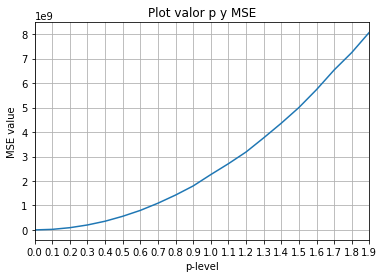

In [12]:
#create 0.1 interval
p_list=np.arange(0,2,0.1)
d_noise={}
noise_level=3600000000
max=False
for i in p_list:
    df_no=additive_noise(df_census, i)
    d_noise[i]=mse(df_census,df_no)
    if d_noise[i] > noise_level and not max:
        max=True
        print(f"Máximo nivel de p aceptable es {i-0.1} para mantener el MSE por debajo de \
{noise_level}")
        
# Graphical plot
ts = pd.Series(d_noise)
graph=ts.plot(grid=True, xticks=ts.index,title="Plot valor p y MSE")
graph.set_xlabel("p-level")
graph.set_ylabel("MSE value")



<div class="alert alert-block alert-success">
Justificación:
    Se fija el nivel máximo de ruido creamos una lista con los valores de 0 a 2 con un intervalo de 0.1 y luego simplemente vamos creando un diccionario con los valores del mse para cada nivel de p con la función que creamos anteriormente de aditive_noise cuando llegamos al umbral imprimimos el valor de p en el paso anterior.
    Por ultimo hacemos un plot de los valores en la gráfica.
    
</div>